In [50]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [51]:
def visualize(arr: np.array):
    img = np.copy(arr)
    img = img - img.min()
    img = img / img.max()
    plt.imshow(img)


def magnitude2(arrX: np.array, arrY: np.array):
    return np.sqrt(arrX**2 + arrY**2)


def interp2(u, v, x, y):
    X = np.floor(x).astype(int)
    Y = np.floor(y).astype(int)
    fracX = x - X
    fracY = y - Y

    A = np.array([u[X + 0, Y + 0], v[X + 0, Y + 0]])
    B = np.array([u[X + 1, Y + 0], v[X + 1, Y + 0]])
    C = np.array([u[X + 0, Y + 1], v[X + 0, Y + 1]])
    D = np.array([u[X + 1, Y + 1], v[X + 1, Y + 1]])
    U1 = (1.0 - fracX) * A + fracX * B
    U2 = (1.0 - fracX) * C + fracX * D
    U = (1.0 - fracY) * U1 + fracY * U2
    return U

def interp1(a, x, y):
    X = np.floor(x).astype(int)
    Y = np.floor(y).astype(int)
    fracX = x - X
    fracY = y - Y

    U1 = (1.0 - fracX) * a[X + 0, Y + 0] + fracX * a[X + 1, Y + 0]
    U2 = (1.0 - fracX) * a[X + 0, Y + 1] + fracX * a[X + 1, Y + 1]
    U = (1.0 - fracY) * U1 + fracY * U2
    return U

In [52]:
d1 = h5py.File('../isabel_2d.h5', 'r')
u = np.array(d1["Velocity"]["X-comp"])
v = np.array(d1["Velocity"]["Y-comp"])
img = np.array([u, v, np.zeros_like(u)])
img.shape

(3, 500, 500)

In [53]:
# trajectories = []
# num_seeds = 500
# mesh_size = u.shape[0]

# # generate seeds
# particles_per_dim = np.ceil(np.sqrt(num_seeds)).astype(int)
# print(particles_per_dim)
# meshgrid = np.meshgrid(np.linspace(0, mesh_size, particles_per_dim), np.linspace(0, mesh_size, particles_per_dim))
# seeds_x = meshgrid[0].flatten()
# seeds_y = meshgrid[1].flatten()

# for i in range(num_seeds):
#     pos_x = seeds_x[i]
#     pos_y = seeds_y[i]
#     trajectory_x = [pos_x]
#     trajectory_y = [pos_y]
#     T = 100
#     dt = 0.1
#     steps = int(T / dt)

#     for j in range(steps):
#         if pos_x < 0 or pos_y < 0:
#             break
#         elif pos_x >= u.shape[0]-2 or pos_y > u.shape[0]-2:
#             break

#         pos_x += interp1(u, pos_x, pos_y) * dt
#         pos_y += interp1(v, pos_x, pos_y) * dt
#         trajectory_x.append(pos_x)
#         trajectory_y.append(pos_y)
#     trajectories.append([trajectory_x, trajectory_y])

In [54]:
ds = 3  # Set a constant arc length step
T = 100
max_steps = 20  # Safety limit for number of steps

trajectories = []
num_seeds = 500
mesh_size = u.shape[0]

# generate seeds
particles_per_dim = np.ceil(np.sqrt(num_seeds)).astype(int)
print(particles_per_dim)
meshgrid = np.meshgrid(np.linspace(0, mesh_size, particles_per_dim), np.linspace(0, mesh_size, particles_per_dim))
seeds_x = meshgrid[0].flatten()
seeds_y = meshgrid[1].flatten()

for i in range(num_seeds):
    pos_x = seeds_x[i]
    pos_y = seeds_y[i]
    trajectory_x = [pos_x]
    trajectory_y = [pos_y]
    
    for _ in range(max_steps):
        if pos_x < 0 or pos_y < 0 or pos_x >= u.shape[0] - 2 or pos_y >= u.shape[0] - 2:
            break
        
        vx = interp1(u, pos_x, pos_y)
        vy = interp1(v, pos_x, pos_y)
        speed = np.sqrt(vx**2 + vy**2)
        
        if speed < 1e-6:
            break  
        
        dt = ds / speed  
        pos_x += vx * dt
        pos_y += vy * dt
        
        trajectory_x.append(pos_x)
        trajectory_y.append(pos_y)
    
    trajectories.append([trajectory_x, trajectory_y])

23


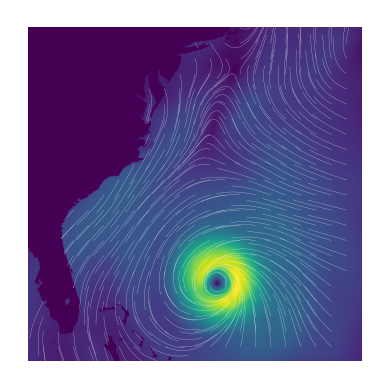

In [55]:
plt.axis('off')
visualize(magnitude2(u, v))
for traj in trajectories:
    plt.plot(traj[1], traj[0], 'w', linewidth=0.15)
plt.savefig("isabel_uniform_500.eps", bbox_inches='tight', pad_inches=0)